# ASSIGNMENT 4
# Submission Deadline: April 16, 6PM
# Submission Link: https://forms.gle/G4B6FiAsyoPLCkZu9  

# Table of Contents

1. [Provide Information](#Provide-Information)
2. [Instructions](#Instructions)
3. [Environment](#Environment)
4. [Hyperparameters](#Hyperparameters)
5. [Helper Functions](#helper)
6. [DDPG](#ddpg)
7. [TD3](#td3)
8. [PPO](#ppo)
9. [Experiments to Run](#experiments)

# Provide Information
<a id="Provide-Information"></a>

Name: **YOUR FULL NAME GOES HERE**

Roll No.: **YOUR ROLL NO**

IITK EMail: **email@iitk.ac.in**

# Instructions
<a id="Instructions"></a>


**Read all the instructions below carefully before you start working on the assignment.**
- The purpose of this course is that you learn RL and the best way to do that is by implementation and experimentation.
- The assignment requires your to implement some algorithms and you are required report your findings after experimenting with those algorithms.
- **You are required to submit ZIP file containing a Jupyter notebook (.ipynb), and an image folder. The notebook would include the code, graphs/plots of the experiments you run and your findings/observations. Image folder is the folder having plots, images, etc.**
- In case you use any maths in your explanations, render it using latex in the Jupyter notebook.
- You are expected to implement algorithms on your own and not copy it from other sources/class mates. Of course, you can refer to lecture slides.
- If you use any reference or material (including code), please cite the source, else it will be considered plagiarism. But referring to other sources that directly solve the problems given in the assignment is not allowed. There is a limit to which you can refer to outside material.
- This is an individual assignment.
- In case your solution is found to have an overlap with solution by someone else (including external sources), all the parties involved will get zero in this and all future assignments plus further more penalties in the overall grade. We will check not just for lexical but also semantic overlap. Same applies for the code as well. Even an iota of cheating would NOT be tolerated. If you cheat one line or cheat one page the penalty would be same.
- Be a smart agent, think long term, if you cheat we will discover it somehow, the price you would be paying is not worth it.
- In case you are struggling with the assignment, seek help from TAs. Cheating is not an option! I respect honesty and would be lenient if you are not able to solve some questions due to difficulty in understanding. Remember we are there to help you out, seek help if something is difficult to understand.
- The deadline for the submission is given above. Submit at least 30 minutes before the deadline, lot can happen at the last moment, your internet can fail, there can be a power failure, you can be abducted by aliens, etc.
- You have to submit your assignment via the Google Form (link above)
- The form would close after the deadline and we will not accept any solution. No reason what-so-ever would be accepted for not being able to submit before the deadline.
- Since the assignment involves experimentation, reporting your results and observations, there is a lot of scope for creativity and innovation and presenting new perspectives. Such efforts would be highly appreciated and accordingly well rewarded. Be an exploratory agent!
- Your code should be very well documented, there are marks for that.
- In your plots, have a clear legend and clear lines, etc. Of course you would generating the plots in your code but you must also put these plots in your notebook. Generate high resolution pdf/svg version of the plots so that it doesn't pixilate on zooming.
- For all experiments, report about the seed used in the code documentation, write about the seed used.
- In your notebook write about all things that are not obvious from the code e.g., if you have made any assumptions, references/sources, running time, etc.
-  **DO NOT Forget to write name, roll no and email details above**
- **In addition to checking your code, we will be conducting one-on-one viva for the evaluation. So please make sure that you do not cheat!**
- **Use of LLMs based tools or AI-based code tools is strictly prohibited! Use of ChatGPT, VS Code, Gemini, CO-Pilot, etc. is not allowed. NOTE VS code is also not allowed. Even in Colab disable the AI assistant. If you use it, we will know it very easily. Use of any of the tools would be counted as cheating and would be given a ZERO, with no questions asked.**
- For each of the sub-part in the question create a new cell below the question and put your answer in there. This includes the plots as well

# OpenAI Gym Environments
<a id="Environment"></a>

In [8]:
!pip install gymnasium

In [1]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from itertools import cycle, count
import time

In [3]:
# all imports go in here
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import time
import random
from itertools import count, cycle
from collections import deque, namedtuple

In this assignment we will be exploring Deep RL algorithms and for this we will be using environmentd provided by OpenAI Gym. In particular we will be exploring "Pendulum-v1" , "Hopper-v4", and "Half-Cheetah" environments (https://gymnasium.farama.org/environments/classic_control/ ). The code to instantiate the environments are given in the cells below. Run these cells and play with the environments to learn more details about the environments.

In [6]:
# Create Inverted Pendulum environment
#https://gymnasium.farama.org/environments/classic_control/cart_pole/

env = gym.make('Pendulum-v1', render_mode="rgb_array")
s = env.reset(seed = 34)
print("Observation Space = ")
print(env.observation_space)
print("Action Space = ")
print(env.action_space)
done = False
for episode in range(20):
    print("In episode {}".format(episode))
    for i in range(100):
        env.render()
        #print(s)
        a = env.action_space.sample()
        print(f'{a}')
        s, r, done, truncated, info = env.step(a)
        print('start')
        print(f'{s} , {r}, {done}, {truncated}, {info}')
        print('done')
        if done:
            print("Finished after {} timestep".format(i+1))
env.close()

Observation Space = 
Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)
Action Space = 
Box(-2.0, 2.0, (1,), float32)
In episode 0
[1.788727]
start
[-0.9971892  -0.07492404  0.99368227] , -9.76982213514776, False, False, {}
done
[1.393611]
start
[-0.9912584  -0.13193506  1.1465309 ] , -9.504707975178734, False, False, {}
done
[-1.3116969]
start
[-0.9847505  -0.17397235  0.8508251 ] , -9.188890598042844, False, False, {}
done
[0.90492076]
start
[-0.9764041  -0.21595158  0.85608387] , -8.874699328269331, False, False, {}
done
[0.50053257]
start
[-0.96737856 -0.25333515  0.7692001 ] , -8.622883792355795, False, False, {}
done
[-0.1254374]
start
[-0.9599016  -0.28033727  0.56038314] , -8.385098638734929, False, False, {}
done
[-1.0437001]
start
[-0.9571433  -0.28961468  0.19357516] , -8.197496667665773, False, False, {}
done
[1.0304595]
start
[-0.95522684 -0.2958745   0.13093309] , -8.114594013753452, False, False, {}
done
[0.14031726]
start
[-0.95625544 -0.29253298 -0.0699252 ] , -8.0742752174

KeyboardInterrupt: 

In [9]:
!pip install swig
!pip install gymnasium[box2d]
!pip install gymnasium[mujoco]


In [10]:
# Create Hopper environment
# https://gymnasium.farama.org/environments/mujoco/hopper/

import gymnasium as gym
env = gym.make("Hopper-v4", render_mode = "rgb_array")
s = env.reset(seed = 34)
print("Observation Space = ")
print(env.observation_space)
print("Action Space = ")
print(env.action_space)
done = False
for episode in range(1):
    print("In episode {}".format(episode))
    for i in range(100):
        env.render()
        print(s)
        a = env.action_space.sample()
        s, r, done, truncated, _ = env.step(a)
        if done:
            print("Finished after {} timestep".format(i+1))
env.close()


Observation Space = 
Box(-inf, inf, (11,), float64)
Action Space = 
Box(-1.0, 1.0, (3,), float32)
In episode 0
(array([ 1.25372177e+00, -2.57257612e-03,  1.51061298e-03, -1.59076170e-04,
        2.88533494e-03,  3.80722565e-03,  3.99721996e-03,  2.09928936e-04,
        4.64165624e-03,  4.11351193e-03,  1.77765794e-03]), {})
[ 1.25333849e+00 -2.49440026e-03  7.72634425e-04  1.15348477e-03
  7.13697601e-03  2.98801523e-02 -9.79884042e-02 -5.10258291e-02
 -1.72505391e-01  1.42262710e-01  1.06987423e+00]
[ 1.25237016e+00 -4.99555096e-03 -1.77969437e-03  2.72196656e-04
  1.08096455e-02 -5.88443331e-02 -1.44253867e-01 -5.73696763e-01
 -4.65314710e-01 -3.62179709e-01 -1.50286142e-01]
[ 1.25080839e+00 -4.95729941e-03 -1.84924505e-03  5.04945991e-04
  1.18791103e-02  5.87178225e-02 -2.44299725e-01  5.08380534e-01
  4.64015572e-01  2.29536466e-01  4.27510093e-01]
[ 1.24859690e+00  2.14875033e-04  3.62011535e-03  1.70220164e-03
  1.25889434e-02  3.40500327e-02 -3.07600818e-01  4.66239838e-01
  5.

In [11]:

!pip install gymnasium
!pip install swig
!pip install gymnasium[box2d]
!pip install gymnasium[mujoco]

# Create Half-Cheetah environment
# https://gymnasium.farama.org/environments/mujoco/hopper/


import gymnasium as gym
env = gym.make("HalfCheetah-v4", render_mode = "rgb_array")
s = env.reset(seed = 34)
print("Observation Space = ")
print(env.observation_space)
print("Action Space = ")
print(env.action_space)
done = False
for episode in range(1):
    print("In episode {}".format(episode))
    for i in range(100):
        env.render()
        print(s)
        a = env.action_space.sample()
        s, r, done, truncated, _ = env.step(a)
        if done:
            print("Finished after {} timestep".format(i+1))
env.close()


^C
Observation Space = 
Box(-inf, inf, (17,), float64)
Action Space = 
Box(-1.0, 1.0, (6,), float32)
In episode 0
(array([ 0.07443538, -0.05145152,  0.03021226, -0.00318152,  0.0577067 ,
        0.07614451,  0.0799444 ,  0.00419858, -0.06093145,  0.06146804,
        0.04904031, -0.01182644, -0.07192433, -0.08793664, -0.10080283,
        0.02766291, -0.03509065]), {})
[ 0.0623149  -0.01755368  0.25082791 -0.32624014  0.16743768  0.39131393
 -0.3320123  -0.11251731  0.62214614 -0.55549677  0.69271004  5.16288921
 -7.06520823  2.80121652  8.0936934  -9.43427988 -3.27794585]
[ 5.51876425e-03 -5.58395208e-02  1.00611833e-01  1.16324962e-01
  4.55293067e-01  4.85370313e-01 -3.96683741e-01 -3.96718009e-01
 -4.10275578e-01 -1.35475965e+00 -1.35797219e+00 -5.04860751e+00
  1.27543780e+01  5.56740976e+00 -1.76750838e+00  2.71642478e+00
 -6.05199199e+00]
[-4.27427844e-02 -5.97743570e-02 -1.81890120e-01  2.29068190e-01
  3.83454613e-01 -6.90031317e-03  1.00405609e-01 -5.11934398e-01
 -1.03943675e+

# Hyperparameters
<a id="Hyperparameters"></a>

All your hyperparameters should be stated here. We will change their value here and your code should work  accordingly.

In [ ]:
# mention the values of all the hyperparameters (you can add more hyper-paramters as well) to be used in the entire notebook, put the values that gave the best
# performance and were finally used for the agent

gamma =
noiseScaleRatio =
minSamples =
epocs =
tau =



MAX_TRAIN_EPISODES = 120
MAX_EVAL_EPISODES = 1
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Helper Functions
<a id="helper"></a>

Write all the helper functions that will be used for value-based and policy based algorithms below. In case you want to add more helper functions, please feel free to add.

In [12]:
#Value Network
def createValueNetwork(inDim, outDim, hDim = [32,32], activation = F.relu):
    #this creates a Feed Forward Neural Network class and instantiates it and returns the class
    #the class should be derived from torch nn.Module and it should have init and forward method at the very least
    #the forward function should return q-value for each possible action

    #Your code goes in here

    class valueNetwork(nn.Module):
      def __init__(self,
                  input_dim,
                  output_dim,
                  hidden_dim = [32,32],
                  activation_fc=F.relu):

          super(valueNetwork, self).__init__()
          self.activation_fc = activation_fc
          self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

          self.input_layer = nn.Linear(input_dim, hidden_dim[0])
          self.hidden_layers = nn.ModuleList()
          for i in range(len(hidden_dim)-1):
              in_dim = hidden_dim[i]
              if i == 0:
                  in_dim += output_dim
              hidden_layer = nn.Linear(in_dim, hidden_dim[i+1])
              self.hidden_layers.append(hidden_layer)
          self.output_layer = nn.Linear(hidden_dim[-1], 1)

          device = "cpu"
          if torch.cuda.is_available():
              device = "cuda:0"
          self.device = torch.device(device)
          self.to(self.device)

      def _format(self, state, action):
          x, u = state, action
          if not isinstance(x, torch.Tensor):
              x = torch.tensor(x,
                              device=self.device,
                              dtype=torch.float32)
              x = x.unsqueeze(0)
          if not isinstance(u, torch.Tensor):
              u = torch.tensor(u,
                              device=self.device,
                              dtype=torch.float32)
              u = u.unsqueeze(0)
          return x, u

      def forward(self, state, action):
          x, u = self._format(state, action)
          x = self.activation_fc(self.input_layer(x))
          for i, hidden_layer in enumerate(self.hidden_layers):
              if i == 0:
                  x = torch.cat((x, u), dim=1)
              x = self.activation_fc(hidden_layer(x))
          return self.output_layer(x)

      def load(self, experiences):
          states, actions, new_states, rewards, is_terminals = experiences
          states = torch.from_numpy(states).float().to(self.device)
          actions = torch.from_numpy(actions).float().to(self.device)
          new_states = torch.from_numpy(new_states).float().to(self.device)
          rewards = torch.from_numpy(rewards).float().to(self.device)
          is_terminals = torch.from_numpy(is_terminals).float().to(self.device)
          return states, actions, new_states, rewards, is_terminals

    return valueNetwork(inDim, outDim, hDim, activation)

In [13]:
def createTwinValueNetwork(inDim, outDim, hDim = [32,32], activation = F.relu):

    class twinValueNetwork(nn.Module):
        def __init__(self,
                    input_dim,
                    output_dim,
                    hidden_dims=(32,32),
                    activation_fc=F.relu):
            super(twinValueNetwork, self).__init__()
            self.activation_fc = activation_fc

            self.input_layer_a = nn.Linear(input_dim + output_dim, hidden_dims[0])
            self.input_layer_b = nn.Linear(input_dim + output_dim, hidden_dims[0])

            self.hidden_layers_a = nn.ModuleList()
            self.hidden_layers_b = nn.ModuleList()
            for i in range(len(hidden_dims)-1):
                hidden_layer_a = nn.Linear(hidden_dims[i], hidden_dims[i+1])
                self.hidden_layers_a.append(hidden_layer_a)

                hidden_layer_b = nn.Linear(hidden_dims[i], hidden_dims[i+1])
                self.hidden_layers_b.append(hidden_layer_b)

            self.output_layer_a = nn.Linear(hidden_dims[-1], 1)
            self.output_layer_b = nn.Linear(hidden_dims[-1], 1)

            device = "cpu"
            if torch.cuda.is_available():
                device = "cuda:0"
            self.device = torch.device(device)
            self.to(self.device)

        def _format(self, state, action):
            x, u = state, action
            if not isinstance(x, torch.Tensor):
                x = torch.tensor(x,
                                device=self.device,
                                dtype=torch.float32)
                x = x.unsqueeze(0)
            if not isinstance(u, torch.Tensor):
                u = torch.tensor(u,
                                device=self.device,
                                dtype=torch.float32)
                u = u.unsqueeze(0)
            return x, u

        def forward(self, state, action):
            x, u = self._format(state, action)
            x = torch.cat((x, u), dim=1)
            xa = self.activation_fc(self.input_layer_a(x))
            xb = self.activation_fc(self.input_layer_b(x))
            for hidden_layer_a, hidden_layer_b in zip(self.hidden_layers_a, self.hidden_layers_b):
                xa = self.activation_fc(hidden_layer_a(xa))
                xb = self.activation_fc(hidden_layer_b(xb))
            xa = self.output_layer_a(xa)
            xb = self.output_layer_b(xb)
            return xa, xb

        def Qa(self, state, action):
            x, u = self._format(state, action)
            x = torch.cat((x, u), dim=1)
            xa = self.activation_fc(self.input_layer_a(x))
            for hidden_layer_a in self.hidden_layers_a:
                xa = self.activation_fc(hidden_layer_a(xa))
            return self.output_layer_a(xa)

        def load(self, experiences):
            states, actions, new_states, rewards, is_terminals = experiences
            states = torch.from_numpy(states).float().to(self.device)
            actions = torch.from_numpy(actions).float().to(self.device)
            new_states = torch.from_numpy(new_states).float().to(self.device)
            rewards = torch.from_numpy(rewards).float().to(self.device)
            is_terminals = torch.from_numpy(is_terminals).float().to(self.device)
            return states, actions, new_states, rewards, is_terminals

    return twinValueNetwork(inDim, outDim, hDim, activation)

In [14]:
#Policy Network
def createPolicyNetwork(inDim, action_limit, hDim = [32,32], activation = F.relu, out_activation = F.tanh):
    #this creates a Feed Forward Neural Network class and instantiates it and returns the class
    #the class should be derived from torch nn.Module and it should have init and forward method at the very least
    #the forward function should return action logit vector
    #Your code goes in here

    class policyNetwork(nn.Module):
      def __init__(self,
                  input_dim,
                  action_bounds,
                  hidden_dims=(32,32),
                  activation_fc=F.relu,
                  out_activation_fc=F.tanh):
          super(policyNetwork, self).__init__()
          self.activation_fc = activation_fc
          self.out_activation_fc = out_activation_fc
          self.env_min, self.env_max = action_bounds

          self.input_layer = nn.Linear(input_dim, hidden_dims[0])
          self.hidden_layers = nn.ModuleList()
          for i in range(len(hidden_dims)-1):
              hidden_layer = nn.Linear(hidden_dims[i], hidden_dims[i+1])
              self.hidden_layers.append(hidden_layer)
          self.output_layer = nn.Linear(hidden_dims[-1], len(self.env_max))

          device = "cpu"
          if torch.cuda.is_available():
              device = "cuda:0"
          self.device = torch.device(device)
          self.to(self.device)

          self.env_min = torch.tensor(self.env_min,
                                      device=self.device,
                                      dtype=torch.float32)

          self.env_max = torch.tensor(self.env_max,
                                      device=self.device,
                                      dtype=torch.float32)

          self.nn_min = self.out_activation_fc(
              torch.Tensor([float('-inf')])).to(self.device)
          self.nn_max = self.out_activation_fc(
              torch.Tensor([float('inf')])).to(self.device)
          self.rescale_fn = lambda x: (x - self.nn_min) * (self.env_max - self.env_min) / \
                                      (self.nn_max - self.nn_min) + self.env_min

      def _format(self, state):
          x = state
          if not isinstance(x, torch.Tensor):
              x = torch.tensor(x,
                              device=self.device,
                              dtype=torch.float32)
              x = x.unsqueeze(0)
          return x

      def forward(self, state):
          x = self._format(state)
          x = self.activation_fc(self.input_layer(x))
          for hidden_layer in self.hidden_layers:
              x = self.activation_fc(hidden_layer(x))
          x = self.output_layer(x)
          x = self.out_activation_fc(x)
          return self.rescale_fn(x)

    return policyNetwork(inDim, action_limit, hDim, activation, out_activation)

## ReplayBuffer

In next few cells, you will implement replaybuffer class.

This class creates a buffer for storing and retrieving experiences. This is a generic class and can be used
for different agents like NFQ, DQN, DDQN, PER_DDQN, etc.
Following are the methods for this class which are implemented in subsequent cells

```
class ReplayBuffer():
    def __init__(self, bufferSize, batch_size, seed)
    def store(self, state, action, reward, next_state, done)
    def sample(self, batchSize)
    def length(self)
```   

In [15]:
class ReplayBuffer():
    def __init__(self,
                 max_size=10000,
                 batch_size=64):
        self.ss_mem = np.empty(shape=(max_size), dtype=np.ndarray)
        self.as_mem = np.empty(shape=(max_size), dtype=np.ndarray)
        self.rs_mem = np.empty(shape=(max_size), dtype=np.ndarray)
        self.ps_mem = np.empty(shape=(max_size), dtype=np.ndarray)
        self.ds_mem = np.empty(shape=(max_size), dtype=np.ndarray)

        self.max_size = max_size
        self.batch_size = batch_size
        self._idx = 0
        self.size = 0

    def store(self, sample):
        s, a, r, p, d = sample
        self.ss_mem[self._idx] = s
        self.as_mem[self._idx] = a
        self.rs_mem[self._idx] = r
        self.ps_mem[self._idx] = p
        self.ds_mem[self._idx] = d

        self._idx += 1
        self._idx = self._idx % self.max_size

        self.size += 1
        self.size = min(self.size, self.max_size)

    def sample(self, batch_size=None):
        if batch_size == None:
            batch_size = self.batch_size

        idxs = np.random.choice(
            self.size, batch_size, replace=False)
        experiences = np.vstack(self.ss_mem[idxs]), \
                      np.vstack(self.as_mem[idxs]), \
                      np.vstack(self.rs_mem[idxs]), \
                      np.vstack(self.ps_mem[idxs]), \
                      np.vstack(self.ds_mem[idxs])
        return experiences

    def length(self):
        #tells the number of experiences stored in the internal buffer
        #
        #Your code goes in here
        #

        return self.size

In [16]:
#in case you want to create any other helper function, the code goes in here
def reset_env(env, seed=None, options=None):
    # Reset the environment with seed and options, handling new seeding mechanism
    initial_observation, info = env.reset(seed=seed, options=options)
    return initial_observation, info

## Deep Deterministic Policy Gradient (DDPG) ##
<a id="ddpg"></a>

Implement the Deep Deterministic Policy Gradient (DDPG) agent. We have studied about DDPG agent in the Lecture. Use the function definitions (given below).

This class implements the DDPG agent, you are required to implement the various methods of this class
as outlined below. Note this class is generic and should work with any permissible Gym environment

```
class DDPG():
    def init(self, env, seed, gamma, tau, bufferSize, batch_size, updateFrequency,
             policyOptimizerFn, valueOptimizerFn,
             policyOptimizerLR,valueOptimizerLR,
             MAX_TRAIN_EPISODES,MAX_EVAL_EPISODE,
             optimizerFn)
    
    def runDDPG(self)
    def trainAgent(self)
    def gaussianStrategy(self, net , s , envActionRange , noiseScaleRatio,
        explorationMax = True)
    def greedyStrategy(self, net , s , envActionRange)
    def trainNetworks(self, experiences)
    def updateNetworks(self, onlineNet, targetNet, tau)
    def evaluateAgent(self)




```

In [17]:
class DDPG():
    def __init__(self, env_id, seed, gamma, tau,
                 policy_max_grad_norm,
                 policy_optimizer_fn,
                 policy_optimizer_lr,
                 value_max_grad_norm,
                 value_optimizer_fn,
                 value_optimizer_lr,
                 n_warmup_batches,
                 MAX_TRAIN_EPISODES,MAX_EVAL_EPISODES,
                 noiseScaleRatio,
                 update_target_every_steps):
        #this DDPG method
        # 1. creates and initializes (with seed) the environment, train/eval episodes, gamma, etc.
        # 2. creates and intializes all the variables required for book-keeping values via the initBookKeeping method
        # 3. creates targetValueNetwork , targetPolicyNetwork
        # 4. creates and initializes (with network params) the optimizer function
        # 5. creates onlineValueNetwork, onlinePolicyNetwork
        # 6. Creates the replayBuffer

        #Your code goes in here
        self.env = gym.make(env_id)
        self.seed = seed
        reset_env(self.env, seed=seed)  # Seed the environment (affects environment operations)
        torch.manual_seed(seed)  # Seed PyTorch (global effect)
        np.random.seed(seed)  # Seed NumPy (global effect)
        random.seed(seed)

        inDim = self.env.observation_space.shape[0]
        outDim = self.env.action_space.shape[0]
        action_bounds = self.env.action_space.low, self.env.action_space.high
        hDim = [256,256]  # Example hidden layer dimensions, adjust as needed
        activation = torch.nn.functional.relu  # Specify the activation function
        out_activation = torch.nn.functional.tanh
        self.target_value_model = createValueNetwork(inDim, outDim, hDim, activation)
        self.online_value_model = createValueNetwork(inDim, outDim, hDim, activation)

        self.low, self.high = action_bounds
        self.exploration_noise_ratio = noiseScaleRatio
        self.ratio_noise_injected = 0
        self.low_g, self.high_g = action_bounds

        self.target_policy_model = createPolicyNetwork(inDim, action_bounds, hDim, activation, out_activation)
        self.online_policy_model = createPolicyNetwork(inDim, action_bounds, hDim, activation, out_activation)

        self.policy_max_grad_norm = policy_max_grad_norm
        self.policy_optimizer_fn = policy_optimizer_fn
        self.policy_optimizer_lr = policy_optimizer_lr

        self.value_max_grad_norm = value_max_grad_norm
        self.value_optimizer_fn = value_optimizer_fn
        self.value_optimizer_lr = value_optimizer_lr

        self.v_optimizer = self.value_optimizer_fn(self.online_value_model,
                                                       self.value_optimizer_lr)
        self.p_optimizer = self.policy_optimizer_fn(self.online_policy_model,
                                                         self.policy_optimizer_lr)

        self.replay_buffer_fn = lambda: ReplayBuffer(max_size=100000, batch_size=256)

        self.n_warmup_batches = n_warmup_batches
        self.MAX_TRAIN_EPISODES = MAX_TRAIN_EPISODES
        self.MAX_EVAL_EPISODES = MAX_EVAL_EPISODES
        self.update_target_every_steps = update_target_every_steps
        self.tau = tau
        self.gamma = gamma




In [18]:
class DDPG(DDPG):
    def updateNetworks(self, tau=None):
        #this function updates the onlineNetwork with the target network
        #
        # Your code goes in here
        #
        tau = self.tau if tau is None else tau
        for target, online in zip(self.target_value_model.parameters(),
                                  self.online_value_model.parameters()):
            target_ratio = (1.0 - tau) * target.data
            online_ratio = tau * online.data
            mixed_weights = target_ratio + online_ratio
            target.data.copy_(mixed_weights)

        for target, online in zip(self.target_policy_model.parameters(),
                                  self.online_policy_model.parameters()):
            target_ratio = (1.0 - tau) * target.data
            online_ratio = tau * online.data
            mixed_weights = target_ratio + online_ratio
            target.data.copy_(mixed_weights)


In [19]:
class DDPG(DDPG):
    def gaussianStrategy(self, model , state ,
        explorationMax = True ):
        #this function sets the scale of exploration then add the noise of this scale to the greedy action
        #and clips it within the range

        #Your code here
        if explorationMax:
            noise_scale = self.high
        else:
            noise_scale = self.exploration_noise_ratio * self.high

        with torch.no_grad():
            greedy_action = model(state).cpu().detach().data.numpy().squeeze()

        noise = np.random.normal(loc=0, scale=noise_scale, size=len(self.high))
        noisy_action = greedy_action + noise
        action = np.clip(noisy_action, self.low, self.high)

        self.ratio_noise_injected = np.mean(abs((greedy_action - action)/(self.high - self.low)))
        return action


In [20]:
class DDPG(DDPG):
    def greedyStrategy(self, model , state ):
        #this function selects the greedy action
        #and clips it within the range

        #Your code here
        with torch.no_grad():
            greedy_action = model(state).cpu().detach().data.numpy().squeeze()

        action = np.clip(greedy_action, self.low, self.high)
        return np.reshape(action, self.high.shape)


In [39]:
class DDPG(DDPG):
    def stepint (self, state , env ):

        min_samples = self.replay_buffer.batch_size * self.n_warmup_batches
        action = self.gaussianStrategy(self.online_policy_model,
                                                      state,
                                                      (self.replay_buffer.length()) < min_samples)
        new_state, reward, is_terminal, is_truncated, info = env.step(action)
        is_failure = is_terminal and not is_truncated
        experience = (state, action, reward, new_state, float(is_failure))
        self.replay_buffer.store(experience)
        self.episode_reward[-1] += reward
        self.episode_timestep[-1] += 1
        #self.episode_exploration[-1] += self.training_strategy.ratio_noise_injected
        return new_state, (is_truncated or is_terminal)

In [17]:
class DDPG(DDPG):
    def runDDPG (self):
        #this is the main method, it trains the agent, performs bookkeeping while training and finally evaluates
        #the agent and returns the following quantities:
        #1. episode wise mean train rewards
        #2. epsiode wise mean eval rewards
        #2. episode wise trainTime (in seconds): time elapsed during training since the start of the first episode
        #3. episode wise wallClockTime (in seconds): actual time elapsed since the start of training,
        #                               note this will include time for BookKeeping and evaluation
        # Note both trainTime and wallClockTime get accumulated as episodes proceed.
        #
        resultList, trainTimeList, evalRewardsList, wallClockTimeList = self.trainAgent()
        resultEval = self.evaluateAgent()
        finalEvalReward  = np.mean(resultEval)

        return resultList, trainTimeList, evalRewardsList, wallClockTimeList, finalEvalReward


In [33]:
class DDPG(DDPG):
    def trainAgent(self):
        #this method collects experiences and trains the agent and does BookKeeping while training.
        #this calls the trainNetwork() method internally, it also evaluates the agent per episode
        #it trains the agent for MAX_TRAIN_EPISODES
        #
        #Your code goes in here
        training_start = time.time()
        torch.manual_seed(self.seed) ; np.random.seed(self.seed) ; random.seed(self.seed)
        global train_count
        train_count +=1

        self.episode_timestep = []
        self.episode_reward = []
        self.episode_seconds = []
        self.evaluation_scores = []
        self.episode_exploration = []

        self.updateNetworks(tau=1.0)
        self.value_optimizer = self.v_optimizer
        self.policy_optimizer = self.p_optimizer

        self.replay_buffer = self.replay_buffer_fn()

        max_episodes = self.MAX_TRAIN_EPISODES
        result = np.empty((max_episodes, 5))
        result[:] = np.nan
        training_time = 0
        for episode in range(1, max_episodes + 1):
            episode_start = time.time()
            print(f'Episode {episode} and train called {train_count} times')
            state, _ = self.env.reset(seed=self.seed)
            self.episode_reward.append(0.0)
            self.episode_timestep.append(0.0)
            self.episode_exploration.append(0.0)

            print('entered count')
            for step in count():
                state, is_terminal = self.stepint(state, self.env)

                min_samples = self.replay_buffer.batch_size * self.n_warmup_batches
                if self.replay_buffer.length() > min_samples:
                    experiences = self.replay_buffer.sample()
                    experiences = self.online_value_model.load(experiences)
                    self.trainNetwork(experiences)

                if np.sum(self.episode_timestep) % self.update_target_every_steps == 0:
                    self.updateNetworks()

                if is_terminal:
                    break

            print('exited count')
            episode_elapsed = time.time() - episode_start
            self.episode_seconds.append(episode_elapsed)
            training_time += episode_elapsed
            evaluation_score= np.mean(self.evaluateAgent())

            total_step = int(np.sum(self.episode_timestep))
            self.evaluation_scores.append(evaluation_score)

            mean_10_reward = np.mean(self.episode_reward[-10:])
            std_10_reward = np.std(self.episode_reward[-10:])
            mean_100_reward = np.mean(self.episode_reward[-100:])
            std_100_reward = np.std(self.episode_reward[-100:])
            mean_100_eval_score = np.mean(self.evaluation_scores[-100:])
            std_100_eval_score = np.std(self.evaluation_scores[-100:])
            #lst_100_exp_rat = np.array(self.episode_exploration[-100:])/np.array(self.episode_timestep[-100:])
            #mean_100_exp_rat = np.mean(lst_100_exp_rat)
            #std_100_exp_rat = np.std(lst_100_exp_rat)

            wallclock_elapsed = time.time() - training_start
            result[episode-1] = total_step, mean_100_reward, mean_100_eval_score, training_time, wallclock_elapsed
            reached_max_minutes = wallclock_elapsed >= 20 * 60
            reached_max_episodes = episode >= 100
            reached_goal_mean_reward = mean_100_eval_score >= -150
            training_is_over = reached_max_minutes or reached_max_episodes or reached_goal_mean_reward
            if training_is_over:
                if reached_max_minutes: print(u'--> reached_max_minutes \u2715')
                if reached_max_episodes: print(u'--> reached_max_episodes \u2715')
                if reached_goal_mean_reward: print(u'--> reached_goal_mean_reward \u2713')
                break

        final_eval_rwd_list = self.evaluateAgent()
        mean_eval_rwd = np.mean(final_eval_rwd_list)
        wallclock_time = time.time() - training_start
        self.env.close()

        return result, training_time, final_eval_rwd_list, wallclock_time

In [19]:
class DDPG(DDPG):
    def trainNetwork(self, experiences):
        # this method trains the value network epoch number of times and is called by the trainAgent function
        # it essentially uses the experiences to calculate target, using the targets it calculates the error, which
        # is further used for calulating the loss. It then uses the optimizer over the loss
        # to update the params of the network by backpropagating through the network
        # this function does not return anything
        # you can try out other loss functions other than MSE like Huber loss, MAE, etc.
        #
        #Your code goes in here
        states, actions, rewards, next_states, is_terminals = experiences
        batch_size = len(is_terminals)

        argmax_a_q_sp = self.target_policy_model(next_states)
        max_a_q_sp = self.target_value_model(next_states, argmax_a_q_sp)
        target_q_sa = rewards + self.gamma * max_a_q_sp * (1 - is_terminals)
        q_sa = self.online_value_model(states, actions)
        td_error = q_sa - target_q_sa.detach()
        value_loss = td_error.pow(2).mul(0.5).mean()
        self.value_optimizer.zero_grad()
        value_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.online_value_model.parameters(),
                                       self.value_max_grad_norm)
        self.value_optimizer.step()

        argmax_a_q_s = self.online_policy_model(states)
        max_a_q_s = self.online_value_model(states, argmax_a_q_s)
        policy_loss = -max_a_q_s.mean()
        self.policy_optimizer.zero_grad()
        policy_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.online_policy_model.parameters(),
                                       self.policy_max_grad_norm)
        self.policy_optimizer.step()

In [36]:
class DDPG(DDPG):
    def evaluateAgent(self):
        #this function evaluates the agent using the value network, it evaluates agent for MAX_EVAL_EPISODES
        #typcially MAX_EVAL_EPISODES = 1

        rwd_list = []
        for eval_episode in range(self.MAX_EVAL_EPISODES):
            s, _ = self.env.reset(seed=self.seed)
            total_reward = 0
            rwd_list.append(0)
            for step in count():
                a = self.greedyStrategy(self.online_policy_model, s)
                s, rwd, done, truncated,_ = self.env.step(a)
                total_reward += rwd
                rwd_list[-1] += rwd
                if done or truncated: break
        return rwd_list
        return finalEvalRewardsList

In [40]:
train_count=0
ddpg_results = []
best_agent, best_eval_score = None, float('-inf')
seed_list = [420, 133, 74, 317, 233]

for myseed in seed_list:

    policy_optimizer_fn = lambda net, lr: optim.Adam(net.parameters(), lr=lr)
    policy_max_grad_norm = float('inf')
    policy_optimizer_lr = 0.0003
    val_optimizer_fn = lambda net, lr: optim.Adam(net.parameters(), lr=lr)
    value_max_grad_norm = float('inf')
    value_optimizer_lr = 0.0003

    n_warmup_batches = 5
    update_target_every_steps = 1
    tau = 0.005

    # Instantiation of the D3QN class
    ddpg_instance = DDPG(
                 env_id='Pendulum-v1',
                 seed=myseed,
                 gamma=0.99,
                 tau = 0.005,
                 policy_max_grad_norm = float('inf'),
                 policy_optimizer_fn = lambda net, lr: optim.Adam(net.parameters(), lr=lr),
                 policy_optimizer_lr = 0.0003,
                 value_max_grad_norm = float('inf'),
                 value_optimizer_fn = lambda net, lr: optim.Adam(net.parameters(), lr=lr),
                 value_optimizer_lr = 0.0003,
                 n_warmup_batches = 5,
                 MAX_TRAIN_EPISODES = 100,
                 MAX_EVAL_EPISODES = 1,
                 noiseScaleRatio = 0.1,
                 update_target_every_steps= 1)

    # Running the NFQ method and appending results
    trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList, final_eval_score = ddpg_instance.runDDPG()
    ddpg_results.append(trainRewardsList)
    if final_eval_score > best_eval_score:
        best_eval_score = final_eval_score
        best_agent = ddpg_instance

# Convert dqn_results to a numpy array for any further processing
ddpg_results = np.array(ddpg_results)

Episode 1 and train called 1 times
entered count
exited count
Episode 2 and train called 1 times
entered count
exited count
Episode 3 and train called 1 times
entered count
exited count
Episode 4 and train called 1 times
entered count
exited count
Episode 5 and train called 1 times
entered count
exited count
Episode 6 and train called 1 times
entered count
exited count
Episode 7 and train called 1 times
entered count
exited count
Episode 8 and train called 1 times
entered count
exited count
Episode 9 and train called 1 times
entered count
exited count
Episode 10 and train called 1 times
entered count
exited count
Episode 11 and train called 1 times
entered count
exited count
Episode 12 and train called 1 times
entered count
exited count
Episode 13 and train called 1 times
entered count
exited count
Episode 14 and train called 1 times
entered count
exited count
Episode 15 and train called 1 times
entered count
exited count
Episode 16 and train called 1 times
entered count
exited count
E

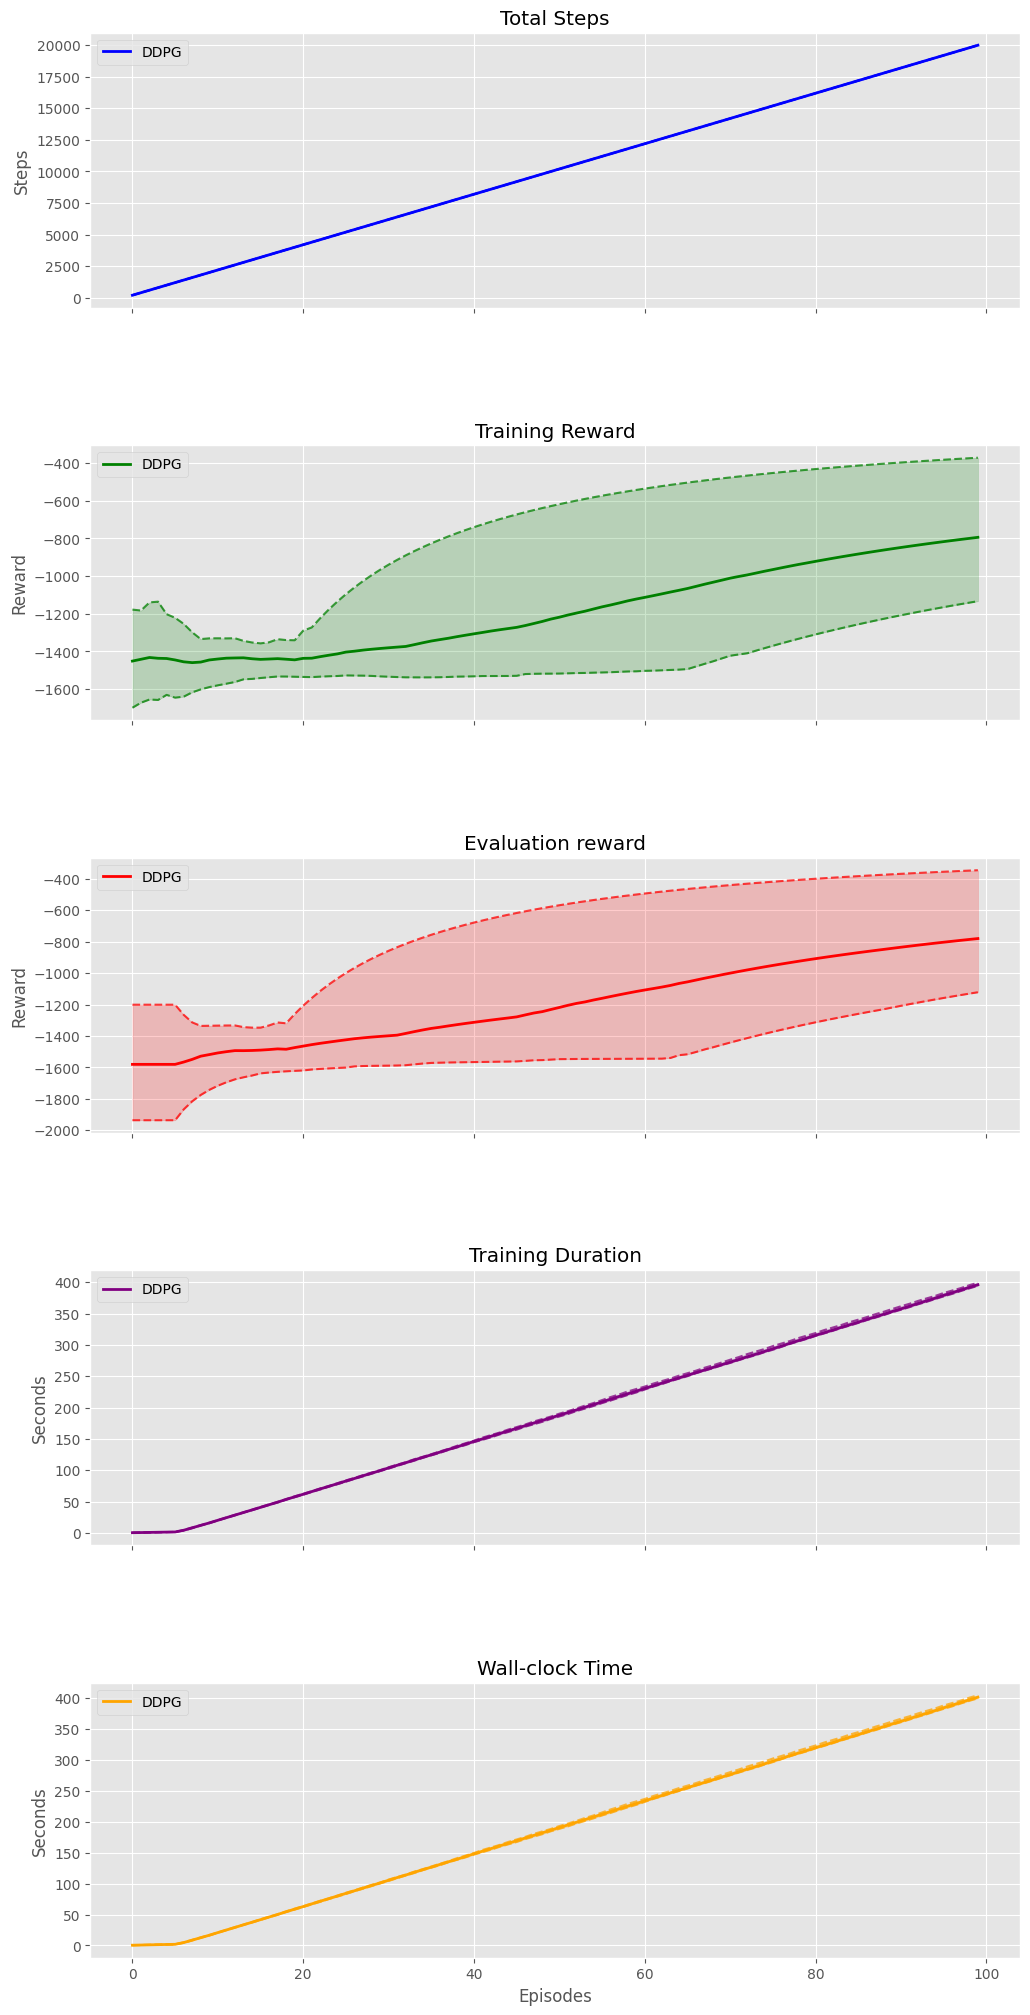

In [42]:
reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max = np.max(ddpg_results, axis=0).T
reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min = np.min(ddpg_results, axis=0).T
reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg = np.mean(ddpg_results, axis=0).T
episode_indices = np.arange(len(reward_avg))

plt.style.use('ggplot')
fig, plot_areas = plt.subplots(5, 1, figsize=(12, 25), sharex='col')
fig.subplots_adjust(hspace=0.5)
colors = ['blue', 'green', 'red', 'purple', 'orange']
titles = ['Total Steps','Training Reward', 'Evaluation reward',  'Training Duration', 'Wall-clock Time']
y_labels = ['Steps', 'Reward', 'Reward', 'Seconds', 'Seconds']
data_max = [reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max]
data_min = [reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min]
data_avg = [reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg]

# Generate plots
for ax, title, color, max_data, min_data, avg_data, y_label in zip(plot_areas, titles, colors, data_max, data_min, data_avg, y_labels):
    ax.plot(max_data, linestyle='--', color=color, alpha=0.75)
    ax.plot(min_data, linestyle='--', color=color, alpha=0.75)
    ax.plot(avg_data, label='DDPG', color=color, linewidth=2)
    ax.fill_between(episode_indices, min_data, max_data, color=color, alpha=0.2)
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.legend()

plot_areas[-1].set_xlabel('Episodes')
plt.show()

# Twin-Delayed Deep Deterministic Policy Gradient (TD3)
<a id="td3"></a>

Implement the Twin-delayed deep deterministic policy gradient (TD3) agent. We have studied about TD3 agent in the Lecture. Use the function definitions (given below).

This class implements the TD3 agent, you are required to implement the various methods of this class
as outlined below. Note this class is generic and should work with any permissible Gym environment

```
class DDPG():
    def init(env, gamma, tau,
    bufferSize ,
    updateFrequencyPolicy ,
    updateFrequencyValue ,
    trainPolicyFrequency ,
    policyOptimizerFn ,
    valueOptimizerFn ,
    policyOptimizerLR ,
    valueOptimizerLR ,
    MAX TRAIN EPISODES,
    MAX EVAL EPISODE,
    optimizerFn )
    
    def runTD3 (self)
    def trainAgent (self)
    def gaussianStrategy (self, net , s , envActionRange , noiseScaleRatio ,
        explorationMax = True)
    def greedyStrategy (self, net , s , envActionRange)
    def trainNetworks (self,experiences , envActionRange)
    def updateValueNetwork(self, onlineNet, targetNet, tau)
    def updatePolicyNetwork(self, onlineNet, targetNet, tau)
    def evaluateAgent (self)



```

In [51]:
class TD3():
    def __init__(self,env_id, seed, gamma, tau,
                 policy_max_grad_norm,
                 policy_optimizer_fn,
                 policy_optimizer_lr,
                 value_max_grad_norm,
                 value_optimizer_fn,
                 value_optimizer_lr,
                 n_warmup_batches,
                 update_value_target_every_steps,
                 update_policy_target_every_steps,
                 train_policy_every_steps,
                 MAX_TRAIN_EPISODES,MAX_EVAL_EPISODES,
                 init_noise_ratio,
                 min_noise_ratio,
                 decay_steps,
                 policy_noise_ratio,
                 policy_noise_clip_ratio):
        #this TD3 method
        # 1. creates and initializes (with seed) the environment, train/eval episodes, gamma, etc.
        # 2. creates and intializes all the variables required for book-keeping values via the initBookKeeping method
        # 3. creates targetValueNetwork , targetPolicyNetwork
        # 4. creates and initializes (with network params) the optimizer function
        # 5. creates onlineValueNetwork, onlinePolicyNetwork
        # 6. Creates the replayBuffer

        #Your code goes in here

        self.env = gym.make(env_id)
        self.seed = seed
        reset_env(self.env, seed=seed)  # Seed the environment (affects environment operations)
        torch.manual_seed(seed)  # Seed PyTorch (global effect)
        np.random.seed(seed)  # Seed NumPy (global effect)
        random.seed(seed)

        inDim = self.env.observation_space.shape[0]
        outDim = self.env.action_space.shape[0]
        action_bounds = self.env.action_space.low, self.env.action_space.high
        hDim = [256,256]  # Example hidden layer dimensions, adjust as needed
        activation = torch.nn.functional.relu  # Specify the activation function
        out_activation = torch.nn.functional.tanh
        self.target_value_model = createTwinValueNetwork(inDim, outDim, hDim, activation)
        self.online_value_model = createTwinValueNetwork(inDim, outDim, hDim, activation)

        self.low, self.high = action_bounds
        self.noise_ratio = init_noise_ratio
        self.init_noise_ratio = init_noise_ratio
        self.min_noise_ratio = min_noise_ratio
        self.decay_steps = decay_steps
        self.ratio_noise_injected = 0
        self.low_g, self.high_g = action_bounds

        self.target_policy_model = createPolicyNetwork(inDim, action_bounds, hDim, activation, out_activation)
        self.online_policy_model = createPolicyNetwork(inDim, action_bounds, hDim, activation, out_activation)

        self.policy_max_grad_norm = policy_max_grad_norm
        self.policy_optimizer_fn = policy_optimizer_fn
        self.policy_optimizer_lr = policy_optimizer_lr

        self.value_max_grad_norm = value_max_grad_norm
        self.value_optimizer_fn = value_optimizer_fn
        self.value_optimizer_lr = value_optimizer_lr

        self.v_optimizer = self.value_optimizer_fn(self.online_value_model,
                                                       self.value_optimizer_lr)
        self.p_optimizer = self.policy_optimizer_fn(self.online_policy_model,
                                                         self.policy_optimizer_lr)

        self.n_warmup_batches = n_warmup_batches
        self.update_value_target_every_steps = update_value_target_every_steps
        self.update_policy_target_every_steps = update_policy_target_every_steps
        self.train_policy_every_steps = train_policy_every_steps
        self.replay_buffer_fn = lambda: ReplayBuffer(max_size=1000000, batch_size=256)

        self.tau = tau
        self.t = 0
        self.policy_noise_ratio = policy_noise_ratio
        self.policy_noise_clip_ratio = policy_noise_clip_ratio
        self.MAX_TRAIN_EPISODES = MAX_TRAIN_EPISODES
        self.MAX_EVAL_EPISODES = MAX_EVAL_EPISODES
        self.gamma = gamma




In [52]:
class TD3(TD3):
    def updateValueNetwork(self, tau=None):
        #this function updates the onlineValueNetwork with the targetValuenetwork
        #
        tau = self.tau if tau is None else tau
        for target, online in zip(self.target_value_model.parameters(),
                                  self.online_value_model.parameters()):
            target_ratio = (1.0 - tau) * target.data
            online_ratio = tau * online.data
            mixed_weights = target_ratio + online_ratio
            target.data.copy_(mixed_weights)

In [53]:
class TD3(TD3):
    def updatePolicyNetwork(self, tau=None):
        #this function updates the onlinePolicuNetwork with the targetPolicynetwork
        #
        # Your code goes in here
        tau = self.tau if tau is None else tau
        for target, online in zip(self.target_policy_model.parameters(),
                                  self.online_policy_model.parameters()):
            target_ratio = (1.0 - tau) * target.data
            online_ratio = tau * online.data
            mixed_weights = target_ratio + online_ratio
            target.data.copy_(mixed_weights)


In [54]:
class TD3(TD3):
    def gaussianStrategy (self, model , state, explorationMax = True ):
        #this function sets the scale of exploration then add the noise of this scale to the greedy action
        #and clips it within the range
        if explorationMax:
            noise_scale = self.high
        else:
            noise_scale = self.noise_ratio * self.high

        with torch.no_grad():
            greedy_action = model(state).cpu().detach().data.numpy().squeeze()

        noise = np.random.normal(loc=0, scale=noise_scale, size=len(self.high))
        noisy_action = greedy_action + noise
        action = np.clip(noisy_action, self.low, self.high)

        self.noise_ratio = self._noise_ratio_update()
        self.ratio_noise_injected = np.mean(abs((greedy_action - action)/(self.high - self.low)))
        return action


In [55]:
class TD3(TD3):
    def _noise_ratio_update(self):

        #this function sets the scale of exploration then add the noise of this scale to the greedy action
        #and clips it within the range
        noise_ratio = 1 - self.t / self.decay_steps
        noise_ratio = (self.init_noise_ratio - self.min_noise_ratio) * noise_ratio + self.min_noise_ratio
        noise_ratio = np.clip(noise_ratio, self.min_noise_ratio, self.init_noise_ratio)
        self.t += 1
        return noise_ratio

In [56]:
class TD3(TD3):
    def greedyStrategy (self, model , state ):
        #this function selects the greedy action
        #and clips it within the range

        #Your code here
        with torch.no_grad():
            greedy_action = model(state).cpu().detach().data.numpy().squeeze()

        action = np.clip(greedy_action, self.low, self.high)
        return np.reshape(action, self.high.shape)


In [57]:
class TD3(TD3):
    def stepint (self, state , env ):

        min_samples = self.replay_buffer.batch_size * self.n_warmup_batches
        action = self.gaussianStrategy(self.online_policy_model,
                                                      state,
                                                      (self.replay_buffer.length()) < min_samples)
        new_state, reward, is_terminal, is_truncated, info = env.step(action)
        is_failure = is_terminal and not is_truncated
        experience = (state, action, reward, new_state, float(is_failure))
        self.replay_buffer.store(experience)
        self.episode_reward[-1] += reward
        self.episode_timestep[-1] += 1
        #self.episode_exploration[-1] += self.training_strategy.ratio_noise_injected
        return new_state, (is_truncated or is_terminal)

In [58]:
class TD3(TD3):
    def runTD3 (self):
        #this is the main method, it trains the agent, performs bookkeeping while training and finally evaluates
        #the agent and returns the following quantities:
        #1. episode wise mean train rewards
        #2. epsiode wise mean eval rewards
        #2. episode wise trainTime (in seconds): time elapsed during training since the start of the first episode
        #3. episode wise wallClockTime (in seconds): actual time elapsed since the start of training,
        #                               note this will include time for BookKeeping and evaluation
        # Note both trainTime and wallClockTime get accumulated as episodes proceed.
        #
        resultList, trainTimeList, evalRewardsList, wallClockTimeList = self.trainAgent()
        resultEval = self.evaluateAgent()
        finalEvalReward  = np.mean(resultEval)

        return resultList, trainTimeList, evalRewardsList, wallClockTimeList, finalEvalReward


In [63]:
class TD3(TD3):
    def trainAgent(self):
        #this method collects experiences and trains the agent and does BookKeeping while training.
        #this calls the trainNetwork() method internally, it also evaluates the agent per episode
        #it trains the agent for MAX_TRAIN_EPISODES
        #
        training_start = time.time()
        torch.manual_seed(self.seed) ; np.random.seed(self.seed) ; random.seed(self.seed)
        global train_count
        train_count +=1

        self.episode_timestep = []
        self.episode_reward = []
        self.episode_seconds = []
        self.evaluation_scores = []
        self.episode_exploration = []

        self.updateValueNetwork(tau=1.0)
        self.updatePolicyNetwork(tau=1.0)

        self.value_optimizer = self.v_optimizer
        self.policy_optimizer = self.p_optimizer

        self.replay_buffer = self.replay_buffer_fn()

        max_episodes = self.MAX_TRAIN_EPISODES

        result = np.empty((max_episodes, 5))
        result[:] = np.nan
        training_time = 0

        for episode in range(1, max_episodes + 1):

            episode_start = time.time()
            print(f'Episode {episode} and train called {train_count} times')
            episode_start = time.time()

            state, _ = self.env.reset(seed=self.seed)
            self.episode_reward.append(0.0)
            self.episode_timestep.append(0.0)
            self.episode_exploration.append(0.0)

            print('entered count')
            for step in count():
                state, is_terminal = self.stepint(state, self.env)

                min_samples = self.replay_buffer.batch_size * self.n_warmup_batches
                if self.replay_buffer.length() > min_samples:
                    experiences = self.replay_buffer.sample()
                    experiences = self.online_value_model.load(experiences)
                    self.trainNetwork(experiences)

                if np.sum(self.episode_timestep) % self.update_value_target_every_steps == 0:
                    self.updateValueNetwork()

                if np.sum(self.episode_timestep) % self.update_policy_target_every_steps == 0:
                    self.updatePolicyNetwork()


                if is_terminal:
                    break

            print('exited count')
            episode_elapsed = time.time() - episode_start
            self.episode_seconds.append(episode_elapsed)
            training_time += episode_elapsed
            evaluation_score= np.mean(self.evaluateAgent())

            total_step = int(np.sum(self.episode_timestep))
            self.evaluation_scores.append(evaluation_score)

            mean_10_reward = np.mean(self.episode_reward[-10:])
            std_10_reward = np.std(self.episode_reward[-10:])
            mean_100_reward = np.mean(self.episode_reward[-100:])
            std_100_reward = np.std(self.episode_reward[-100:])
            mean_100_eval_score = np.mean(self.evaluation_scores[-100:])
            std_100_eval_score = np.std(self.evaluation_scores[-100:])
            #lst_100_exp_rat = np.array(self.episode_exploration[-100:])/np.array(self.episode_timestep[-100:])
            #mean_100_exp_rat = np.mean(lst_100_exp_rat)
            #std_100_exp_rat = np.std(lst_100_exp_rat)

            wallclock_elapsed = time.time() - training_start
            result[episode-1] = total_step, mean_100_reward, mean_100_eval_score, training_time, wallclock_elapsed
            reached_max_minutes = wallclock_elapsed >= 30 * 60
            reached_max_episodes = episode >= 1200
            reached_goal_mean_reward = mean_100_eval_score >= 1500
            training_is_over = reached_max_minutes or reached_max_episodes or reached_goal_mean_reward
            if training_is_over:
                if reached_max_minutes: print(u'--> reached_max_minutes \u2715')
                if reached_max_episodes: print(u'--> reached_max_episodes \u2715')
                if reached_goal_mean_reward: print(u'--> reached_goal_mean_reward \u2713')
                break

        final_eval_rwd_list = self.evaluateAgent()
        mean_eval_rwd = np.mean(final_eval_rwd_list)
        wallclock_time = time.time() - training_start
        self.env.close()

        return result, training_time, final_eval_rwd_list, wallclock_time

In [64]:
class TD3(TD3):
    def trainNetwork(self,experiences):
        # this method trains the value network epoch number of times and is called by the trainAgent function
        # it essentially uses the experiences to calculate target, using the targets it calculates the error, which
        # is further used for calulating the loss. It then uses the optimizer over the loss
        # to update the params of the network by backpropagating through the network
        # this function does not return anything
        # you can try out other loss functions other than MSE like Huber loss, MAE, etc.
        #
        states, actions, rewards, next_states, is_terminals = experiences
        batch_size = len(is_terminals)

        with torch.no_grad():
            a_ran = self.target_policy_model.env_max - self.target_policy_model.env_min
            a_noise = torch.randn_like(actions) * self.policy_noise_ratio * a_ran
            n_min = self.target_policy_model.env_min * self.policy_noise_clip_ratio
            n_max = self.target_policy_model.env_max * self.policy_noise_clip_ratio
            a_noise = torch.max(torch.min(a_noise, n_max), n_min)

            argmax_a_q_sp = self.target_policy_model(next_states)
            noisy_argmax_a_q_sp = argmax_a_q_sp + a_noise
            noisy_argmax_a_q_sp = torch.max(torch.min(noisy_argmax_a_q_sp,
                                                      self.target_policy_model.env_max),
                                            self.target_policy_model.env_min)

            max_a_q_sp_a, max_a_q_sp_b = self.target_value_model(next_states, noisy_argmax_a_q_sp)
            max_a_q_sp = torch.min(max_a_q_sp_a, max_a_q_sp_b)

            target_q_sa = rewards + self.gamma * max_a_q_sp * (1 - is_terminals)

        q_sa_a, q_sa_b = self.online_value_model(states, actions)
        td_error_a = q_sa_a - target_q_sa
        td_error_b = q_sa_b - target_q_sa

        value_loss = td_error_a.pow(2).mul(0.5).mean() + td_error_b.pow(2).mul(0.5).mean()
        self.value_optimizer.zero_grad()
        value_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.online_value_model.parameters(),
                                       self.value_max_grad_norm)
        self.value_optimizer.step()

        if np.sum(self.episode_timestep) % self.train_policy_every_steps == 0:
            argmax_a_q_s = self.online_policy_model(states)
            max_a_q_s = self.online_value_model.Qa(states, argmax_a_q_s)

            policy_loss = -max_a_q_s.mean()
            self.policy_optimizer.zero_grad()
            policy_loss.backward()
            torch.nn.utils.clip_grad_norm_(self.online_policy_model.parameters(),
                                           self.policy_max_grad_norm)
            self.policy_optimizer.step()


In [65]:
class TD3(TD3):
    def evaluateAgent(self):
        #this function evaluates the agent using the value network, it evaluates agent for MAX_EVAL_EPISODES
        #typcially MAX_EVAL_EPISODES = 1

        rwd_list = []
        for eval_episode in range(self.MAX_EVAL_EPISODES):
            s, _ = self.env.reset(seed=self.seed)
            total_reward = 0
            rwd_list.append(0)
            for step in count():
                a = self.greedyStrategy(self.online_policy_model, s)
                s, rwd, done, truncated,_ = self.env.step(a)
                total_reward += rwd
                rwd_list[-1] += rwd
                if done or truncated: break
        return rwd_list
        return finalEvalRewardsList

In [66]:
train_count=0
td3_results = []
best_agent, best_eval_score = None, float('-inf')
seed_list = [420, 133, 74, 317, 233]


for myseed in seed_list:

    policy_optimizer_fn = lambda net, lr: optim.Adam(net.parameters(), lr=lr)
    policy_max_grad_norm = float('inf')
    policy_optimizer_lr = 0.0003
    val_optimizer_fn = lambda net, lr: optim.Adam(net.parameters(), lr=lr)
    value_max_grad_norm = float('inf')
    value_optimizer_lr = 0.0003

    n_warmup_batches = 5
    update_target_every_steps = 1
    tau = 0.005

    # Instantiation of the D3QN class
    td3_instance = TD3(
                 env_id="Hopper-v4",
                 seed=myseed,
                 gamma=0.99,
                 tau = 0.01,
                 policy_max_grad_norm = float('inf'),
                 policy_optimizer_fn = lambda net, lr: optim.Adam(net.parameters(), lr=lr),
                 policy_optimizer_lr = 0.0003,
                 value_max_grad_norm = float('inf'),
                 value_optimizer_fn = lambda net, lr: optim.Adam(net.parameters(), lr=lr),
                 value_optimizer_lr = 0.0003,
                 n_warmup_batches = 5,
                 update_value_target_every_steps=2,
                 update_policy_target_every_steps=2,
                 train_policy_every_steps=2,
                 MAX_TRAIN_EPISODES = 1200,
                 MAX_EVAL_EPISODES = 1,
                 init_noise_ratio=0.5,
                 min_noise_ratio=0.1,
                 decay_steps=200000,
                 policy_noise_ratio=0.1,
                 policy_noise_clip_ratio=0.5)

    # Running the NFQ method and appending results
    trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList, final_eval_score = td3_instance.runTD3()
    td3_results.append(trainRewardsList)
    if final_eval_score > best_eval_score:
        best_eval_score = final_eval_score
        best_agent = td3_instance

# Convert dqn_results to a numpy array for any further processing
td3_results = np.array(td3_results)

Episode 1 and train called 1 times
entered count
exited count
Episode 2 and train called 1 times
entered count
exited count
Episode 3 and train called 1 times
entered count
exited count
Episode 4 and train called 1 times
entered count
exited count
Episode 5 and train called 1 times
entered count
exited count
Episode 6 and train called 1 times
entered count
exited count
Episode 7 and train called 1 times
entered count
exited count
Episode 8 and train called 1 times
entered count
exited count
Episode 9 and train called 1 times
entered count
exited count
Episode 10 and train called 1 times
entered count
exited count
Episode 11 and train called 1 times
entered count
exited count
Episode 12 and train called 1 times
entered count
exited count
Episode 13 and train called 1 times
entered count
exited count
Episode 14 and train called 1 times
entered count
exited count
Episode 15 and train called 1 times
entered count
exited count
Episode 16 and train called 1 times
entered count
exited count
E

KeyboardInterrupt: 

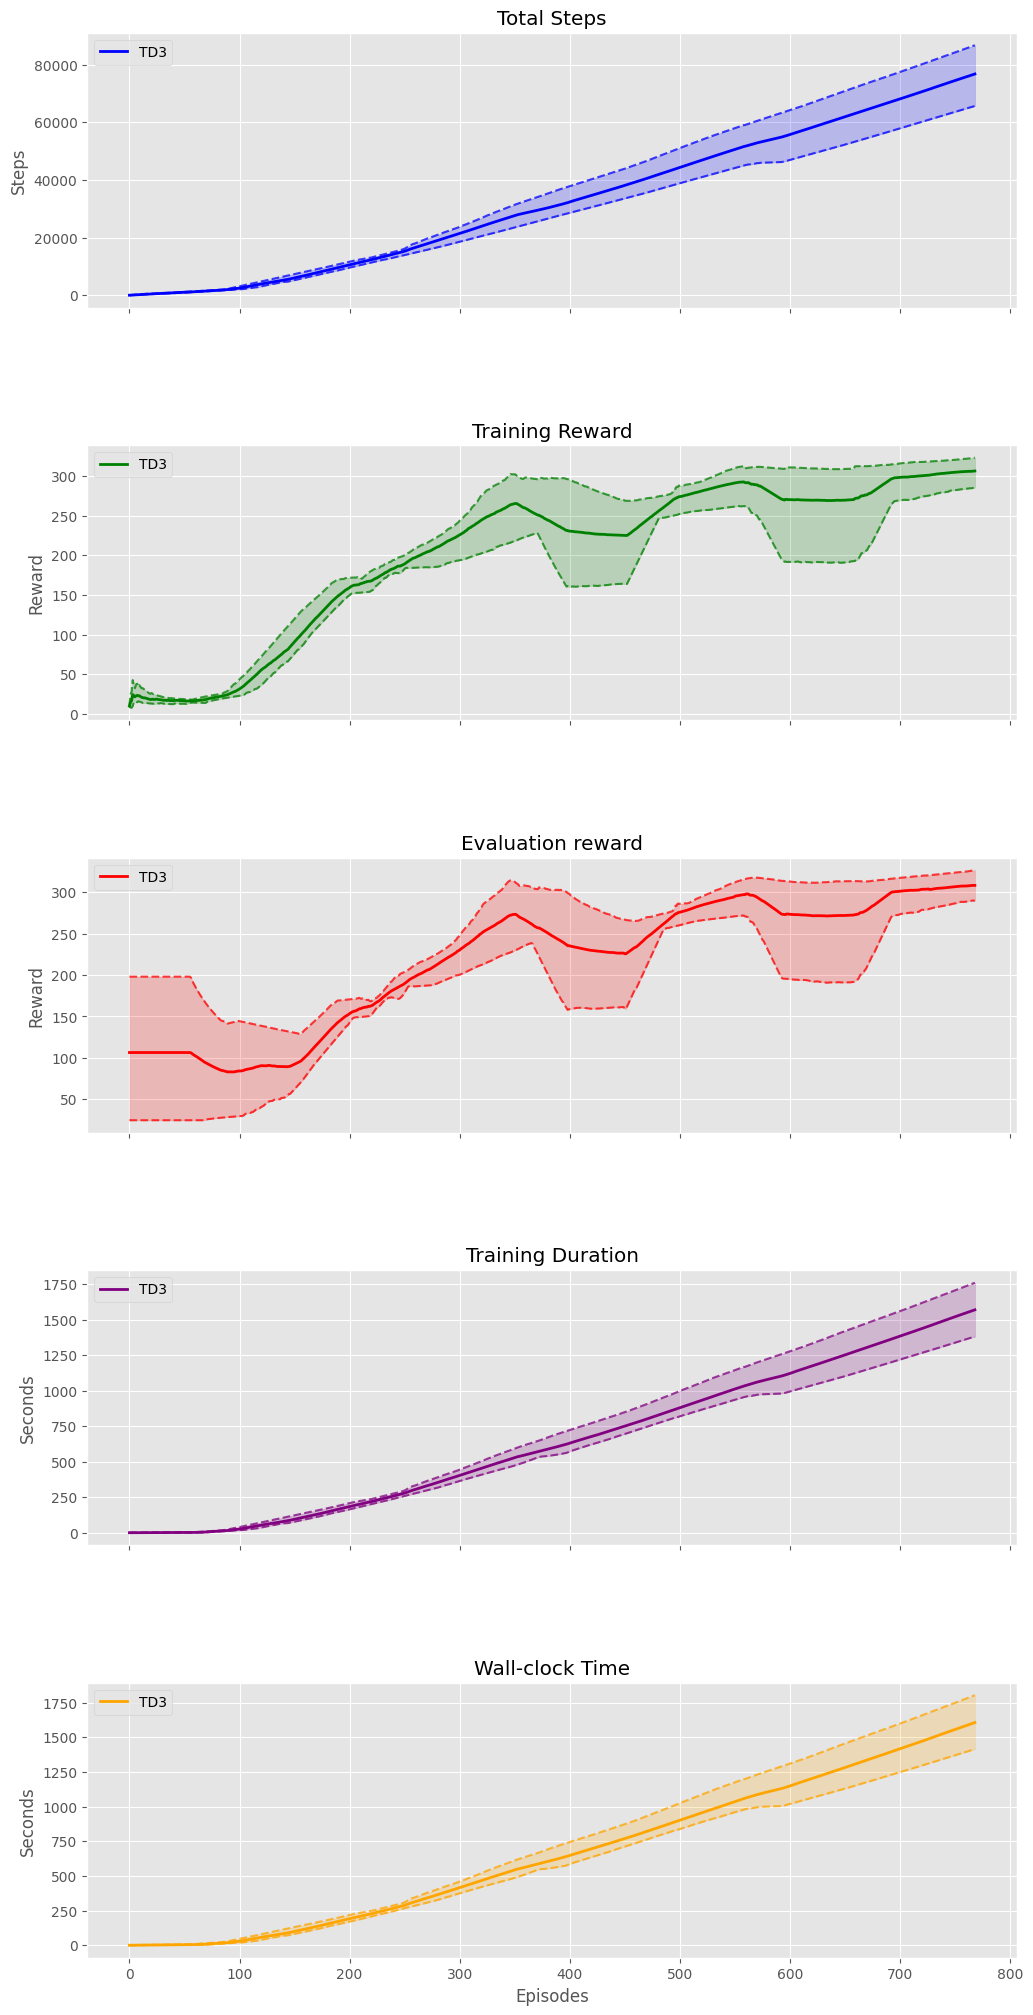

In [67]:
td3_results = np.array(td3_results)

reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max = np.max(td3_results, axis=0).T
reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min = np.min(td3_results, axis=0).T
reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg = np.mean(td3_results, axis=0).T
episode_indices = np.arange(len(reward_avg))

plt.style.use('ggplot')
fig, plot_areas = plt.subplots(5, 1, figsize=(12, 25), sharex='col')
fig.subplots_adjust(hspace=0.5)
colors = ['blue', 'green', 'red', 'purple', 'orange']
titles = ['Total Steps','Training Reward', 'Evaluation reward',  'Training Duration', 'Wall-clock Time']
y_labels = ['Steps', 'Reward', 'Reward', 'Seconds', 'Seconds']
data_max = [reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max]
data_min = [reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min]
data_avg = [reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg]

# Generate plots
for ax, title, color, max_data, min_data, avg_data, y_label in zip(plot_areas, titles, colors, data_max, data_min, data_avg, y_labels):
    ax.plot(max_data, linestyle='--', color=color, alpha=0.75)
    ax.plot(min_data, linestyle='--', color=color, alpha=0.75)
    ax.plot(avg_data, label='TD3', color=color, linewidth=2)
    ax.fill_between(episode_indices, min_data, max_data, color=color, alpha=0.2)
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.legend()

plot_areas[-1].set_xlabel('Episodes')
plt.show()

# PPO
<a id="PPO"></a>

PPO have quite a few key implementation details.
Please Refer:
"Proximal Policy Optimization Algorithms" [PPO](https://arxiv.org/abs/1707.06347) and
"Implementation Matters in Deep RL: A Case Study on PPO and TRPO" [Implementation Matters](https://openreview.net/forum?id=r1etN1rtPB)

Lets finish things off with an easy implementation of PPO!
A easy way to check you implementation details is running your implementation on some easier environment first and make sure it converges. Like "CartPole-v1" should converge to episodic return of 500 in around 300k steps.

In [ ]:
!pip install gymnasium
!pip install swig
!pip install gymnasium[box2d]
!pip install gymnasium[mujoco]

# Create Hopper environment
# https://gymnasium.farama.org/environments/mujoco/hopper/


import gymnasium as gym
env = gym.make("HalfCheetah-v4", render_mode = "rgb_array")
s = env.reset(seed = 34)
print("Observation Space = ")
print(env.observation_space)
print("Action Space = ")
print(env.action_space)
done = False
for episode in range(1):
    print("In episode {}".format(episode))
    for i in range(100):
        #env.render()
        print(s)
        a = env.action_space.sample()
        s, r, done, truncated, _ = env.step(a)
        if done:
            print("Finished after {} timestep".format(i+1))
env.close()


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\vaibh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\vaibh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\vaibh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\vaibh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Observation Space = 
Box(-inf, inf, (17,), float64)
Action Space = 
Box(-1.0, 1.0, (6,), float32)
In episode 0
(array([ 0.07443538, -0.05145152,  0.03021226, -0.00318152,  0.0577067 ,
        0.07614451,  0.0799444 ,  0.00419858, -0.06093145,  0.06146804,
        0.04904031, -0.01182644, -0.07192433, -0.08793664, -0.10080283,
        0.02766291, -0.03509065]), {})
[ 0.06476058  0.02016953 -0.22369726 -0.19299496 -0.27843342 -0.18375486
 -0.14479577  0.15194776 -1.28531079 -0.48985306  1.9097278  -7.12966474
 -5.48685437 -8.23816787 -7.57225371 -6.10281996  3.78178963]
[ 2.89865593e-02 -4.67029341e-03 -1.10229186e-01 -1.25052730e-01
 -4.24762590e-01 -3.58128047e-02 -1.16435815e-01  2.43014353e-01
  1.20342306e+00 -8.44361155e-01 -1.71670273e+00  7.39961143e+00
  5.08826806e+00  8.41658943e-01  8.28064890e+00  4.46978226e+00
  7.66222832e-01]
[-0.03621608 -0.03699635  0.30039566 -0.2874516  -0.13688551  0.56992512
 

In [ ]:
import os
import random
import time
from distutils.util import strtobool

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions.normal import Normal
from itertools import count

gym_id = "HalfCheetah-v4"  #The id of the gym environment
learning_rate = 3e-4
seed = 43
total_timesteps = 200000 #The total timesteps of the experiments
torch_deterministic = True   #If toggled, `torch.backends.cudnn.deterministic=False
cuda = True
capture_video = True

num_envs = 1  #The number of parallel game environments
num_steps = 2048 #The number of steps to run in each environment per policy rollout
anneal_lr = True #Toggle learning rate annealing for policy and value networks
gae = True #Use GAE for advantage computation
gamma = 0.99
gae_lambda = 0.95 #The lambda for the general advantage estimation
num_minibatches = 32
batch_size = int(num_envs * num_steps)
minibatch_size = int(batch_size // num_minibatches)
update_epochs = 10 #The K epochs to update the policy
norm_adv = True  #Toggles advantages normalization
clip_coef = 0.2 #The surrogate clipping coefficient
clip_vloss = True #Toggles whether or not to use a clipped loss for the value function, as per the paper
ent_coef = 0.0 #Coefficient of the entropy
vf_coef = 0.5 #Coefficient of the value function
max_grad_norm = 0.5
target_kl = None #The target KL divergence threshold

episodic_returns = []
global_steps = []
wall_clock_time_ppo = []


def make_env(gym_id, seed, idx, capture_video, run_name):
    def thunk():
        env = gym.make(gym_id)
        env = gym.wrappers.RecordEpisodeStatistics(env)
        #env.seed(seed)
        env = gym.wrappers.ClipAction(env)
        env = gym.wrappers.NormalizeObservation(env)
        env = gym.wrappers.TransformObservation(env, lambda obs: np.clip(obs, -10, 10))
        env = gym.wrappers.NormalizeReward(env)
        env = gym.wrappers.TransformReward(env, lambda reward: np.clip(reward, -10, 10))
        env.action_space.seed(seed)
        env.observation_space.seed(seed)
        return env

    return thunk


def layer_init(layer, std=np.sqrt(2), bias_const=0.0):
    torch.nn.init.orthogonal_(layer.weight, std)
    torch.nn.init.constant_(layer.bias, bias_const)
    return layer


class Agent(nn.Module):
    def __init__(self, envs):
        super(Agent, self).__init__()
        self.critic = nn.Sequential(
            layer_init(nn.Linear(np.array(envs.single_observation_space.shape).prod(), 64)),
            nn.Tanh(),
            layer_init(nn.Linear(64, 64)),
            nn.Tanh(),
            layer_init(nn.Linear(64, 1), std=1.0),
        )
        self.actor_mean = nn.Sequential(
            layer_init(nn.Linear(np.array(envs.single_observation_space.shape).prod(), 64)),
            nn.Tanh(),
            layer_init(nn.Linear(64, 64)),
            nn.Tanh(),
            layer_init(nn.Linear(64, np.prod(envs.single_action_space.shape)), std=0.01),
        )
        self.actor_logstd = nn.Parameter(torch.zeros(1, np.prod(envs.single_action_space.shape)))

    def get_value(self, x):
        return self.critic(x)

    def get_action_and_value(self, x, action=None):
        action_mean = self.actor_mean(x)
        action_logstd = self.actor_logstd.expand_as(action_mean)
        action_std = torch.exp(action_logstd)
        probs = Normal(action_mean, action_std)
        if action is None:
            action = probs.sample()
        return action, probs.log_prob(action).sum(1), probs.entropy().sum(1), self.critic(x)



run_name = f"{gym_id}__{seed}__{int(time.time())}"
device = torch.device("cuda" if torch.cuda.is_available() and cuda else "cpu")


In [ ]:
def evaluateAgent(agent, seed):
    envs = gym.vector.SyncVectorEnv(
        [make_env(gym_id, seed + i, i, capture_video, run_name) for i in range(num_envs)]
    )
    for _ in range(1):
        next_obs, info = envs.reset(seed = seed)
        next_obs = torch.Tensor(next_obs).to(device)
        
        for _ in count():
            with torch.no_grad():
                action, logprob, _, value = agent.get_action_and_value(next_obs)

            # TRY NOT TO MODIFY: execute the game and log data.
            next_obs, reward, done,truncated, info = envs.step(action.cpu().numpy())
            next_obs = torch.Tensor(next_obs).to(device)
            for item in info:
                if item == "final_info" and info[item][0] is not None:
                    return info[item][0]['episode']['r']

In [ ]:
def run_PPO(seed):

    print("{} run".format(seed))
    # TRY NOT TO MODIFY: seeding
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = torch_deterministic


    # env setup
    envs = gym.vector.SyncVectorEnv(
        [make_env(gym_id, seed + i, i, capture_video, run_name) for i in range(num_envs)]
    )
    assert isinstance(envs.single_action_space, gym.spaces.Box), "only continuous action space is supported"

    agent = Agent(envs).to(device)
    optimizer = optim.Adam(agent.parameters(), lr=learning_rate, eps=1e-5)

    # ALGO Logic: Storage setup
    obs = torch.zeros((num_steps, num_envs) + envs.single_observation_space.shape).to(device)
    actions = torch.zeros((num_steps, num_envs) + envs.single_action_space.shape).to(device)
    logprobs = torch.zeros((num_steps, num_envs)).to(device)
    rewards = torch.zeros((num_steps, num_envs)).to(device)
    dones = torch.zeros((num_steps, num_envs)).to(device)
    values = torch.zeros((num_steps, num_envs)).to(device)

    # TRY NOT TO MODIFY: start the game
    global_step = 0
    start_time = time.time()
    next_obs, info = envs.reset(seed = seed)
    next_obs = torch.Tensor(next_obs).to(device)
    next_done = torch.zeros(num_envs).to(device)
    num_updates = total_timesteps // batch_size

    training_start = time.time()
    episode_timestep = []
    episode_reward = []
    episode_seconds = []
    evaluation_scores = []

    episode_counterr = 0

    result = np.empty((200, 5))
    result[:] = np.nan
    training_time = 0

    for update in range(1, num_updates + 1):


        episode_start = time.time()
        episode_reward.append(0.0)
        episode_timestep.append(0.0)

        # Annealing the rate if instructed to do so.
        if anneal_lr:
            frac = 1.0 - (update - 1.0) / num_updates
            lrnow = frac * learning_rate
            optimizer.param_groups[0]["lr"] = lrnow

        for step in range(0, num_steps):
            global_step += 1 * num_envs
            episode_timestep[-1] += 1 * num_envs
            obs[step] = next_obs
            dones[step] = next_done

            # ALGO LOGIC: action logic
            with torch.no_grad():
                action, logprob, _, value = agent.get_action_and_value(next_obs)
                values[step] = value.flatten()
            actions[step] = action
            logprobs[step] = logprob

            # TRY NOT TO MODIFY: execute the game and log data.
            next_obs, reward, done,truncated, info = envs.step(action.cpu().numpy())
            rewards[step] = torch.tensor(reward).to(device).view(-1)
            next_obs, next_done = torch.Tensor(next_obs).to(device), torch.Tensor(done).to(device)
            # print(info)
            # print("*"*100)
            for item in info:
                if item == "final_info" and info[item][0] is not None:
                    print(f"global_step={global_step}, episodic_return={info[item][0]['episode']['r']}")
                    episodic_returns.append(info[item][0]['episode']['r'])
                    global_steps.append(global_step)
                    wall_clock_time_ppo.append(time.time() - start_time)

                    episode_counterr+=1
                    episode_reward[-1] += info[item][0]['episode']['r']
                    episode_elapsed = time.time() - episode_start
                    episode_seconds.append(episode_elapsed)
                    training_time += episode_elapsed
                    evaluation_score= np.mean(evaluateAgent(agent, seed))
                    total_step = int(np.sum(episode_timestep))
                    evaluation_scores.append(evaluation_score)

                    mean_10_reward = np.mean(episode_reward[-10:])
                    std_10_reward = np.std(episode_reward[-10:])
                    mean_100_reward = np.mean(episode_reward[-100:])
                    std_100_reward = np.std(episode_reward[-100:])
                    mean_100_eval_score = np.mean(evaluation_scores[-100:])
                    std_100_eval_score = np.std(evaluation_scores[-100:])
                    #lst_100_exp_rat = np.array(self.episode_exploration[-100:])/np.array(self.episode_timestep[-100:])
                    #mean_100_exp_rat = np.mean(lst_100_exp_rat)
                    #std_100_exp_rat = np.std(lst_100_exp_rat)

                    wallclock_elapsed = time.time() - training_start
                    if episode_counterr == 200:
                        break
                    result[episode_counterr] = total_step, mean_100_reward, mean_100_eval_score, training_time, wallclock_elapsed
                    break
            if episode_counterr == 200:
                break

        # bootstrap value if not done
        with torch.no_grad():
            next_value = agent.get_value(next_obs).reshape(1, -1)
            if gae:
                advantages = torch.zeros_like(rewards).to(device)
                lastgaelam = 0
                for t in reversed(range(num_steps)):
                    if t == num_steps - 1:
                        nextnonterminal = 1.0 - next_done
                        nextvalues = next_value
                    else:
                        nextnonterminal = 1.0 - dones[t + 1]
                        nextvalues = values[t + 1]
                    delta = rewards[t] + gamma * nextvalues * nextnonterminal - values[t]
                    advantages[t] = lastgaelam = delta + gamma * gae_lambda * nextnonterminal * lastgaelam
                returns = advantages + values
            else:
                returns = torch.zeros_like(rewards).to(device)
                for t in reversed(range(num_steps)):
                    if t == num_steps - 1:
                        nextnonterminal = 1.0 - next_done
                        next_return = next_value
                    else:
                        nextnonterminal = 1.0 - dones[t + 1]
                        next_return = returns[t + 1]
                    returns[t] = rewards[t] + gamma * nextnonterminal * next_return
                advantages = returns - values

        # flatten the batch
        b_obs = obs.reshape((-1,) + envs.single_observation_space.shape)
        b_logprobs = logprobs.reshape(-1)
        b_actions = actions.reshape((-1,) + envs.single_action_space.shape)
        b_advantages = advantages.reshape(-1)
        b_returns = returns.reshape(-1)
        b_values = values.reshape(-1)

        # Optimizing the policy and value network
        b_inds = np.arange(batch_size)
        clipfracs = []
        for epoch in range(update_epochs):
            np.random.shuffle(b_inds)
            for start in range(0, batch_size, minibatch_size):
                end = start + minibatch_size
                mb_inds = b_inds[start:end]

                _, newlogprob, entropy, newvalue = agent.get_action_and_value(b_obs[mb_inds], b_actions[mb_inds])
                logratio = newlogprob - b_logprobs[mb_inds]
                ratio = logratio.exp()

                with torch.no_grad():
                    # calculate approx_kl http://joschu.net/blog/kl-approx.html
                    old_approx_kl = (-logratio).mean()
                    approx_kl = ((ratio - 1) - logratio).mean()
                    clipfracs += [((ratio - 1.0).abs() > clip_coef).float().mean().item()]

                mb_advantages = b_advantages[mb_inds]
                if norm_adv:
                    mb_advantages = (mb_advantages - mb_advantages.mean()) / (mb_advantages.std() + 1e-8)

                # Policy loss
                pg_loss1 = -mb_advantages * ratio
                pg_loss2 = -mb_advantages * torch.clamp(ratio, 1 - clip_coef, 1 + clip_coef)
                pg_loss = torch.max(pg_loss1, pg_loss2).mean()

                # Value loss
                newvalue = newvalue.view(-1)
                if clip_vloss:
                    v_loss_unclipped = (newvalue - b_returns[mb_inds]) ** 2
                    v_clipped = b_values[mb_inds] + torch.clamp(
                        newvalue - b_values[mb_inds],
                        -clip_coef,
                        clip_coef,
                    )
                    v_loss_clipped = (v_clipped - b_returns[mb_inds]) ** 2
                    v_loss_max = torch.max(v_loss_unclipped, v_loss_clipped)
                    v_loss = 0.5 * v_loss_max.mean()
                else:
                    v_loss = 0.5 * ((newvalue - b_returns[mb_inds]) ** 2).mean()

                entropy_loss = entropy.mean()
                loss = pg_loss - ent_coef * entropy_loss + v_loss * vf_coef

                optimizer.zero_grad()
                loss.backward()
                nn.utils.clip_grad_norm_(agent.parameters(), max_grad_norm)
                optimizer.step()

            if target_kl is not None:
                if approx_kl > target_kl:
                    break

        y_pred, y_true = b_values.cpu().numpy(), b_returns.cpu().numpy()
        var_y = np.var(y_true)
        explained_var = np.nan if var_y == 0 else 1 - np.var(y_true - y_pred) / var_y
        if episode_counterr == 200:
            break


    envs.close()
    return result



In [ ]:
ppo_results = []
best_agent, best_eval_score = None, float('-inf')
for i in range(5):
    result = run_PPO(i)
    ppo_results.append(result)

ppo_results = np.array(ppo_results)




0 run
global_step=1000, episodic_return=[-325.80692]
global_step=2000, episodic_return=[-363.44492]
global_step=3000, episodic_return=[-375.0975]
global_step=4000, episodic_return=[-370.93326]
global_step=5000, episodic_return=[-289.1749]
global_step=6000, episodic_return=[-406.72104]
global_step=7000, episodic_return=[-317.38184]
global_step=8000, episodic_return=[-251.17192]
global_step=9000, episodic_return=[-299.13226]
global_step=10000, episodic_return=[-338.34933]
global_step=11000, episodic_return=[-370.86636]
global_step=12000, episodic_return=[-355.51993]
global_step=13000, episodic_return=[-310.37793]
global_step=14000, episodic_return=[-325.7186]
global_step=15000, episodic_return=[-364.1203]
global_step=16000, episodic_return=[-263.34338]
global_step=17000, episodic_return=[-359.11215]
global_step=18000, episodic_return=[-355.9242]
global_step=19000, episodic_return=[-299.96744]
global_step=20000, episodic_return=[-302.792]
global_step=21000, episodic_return=[-191.73433]
gl

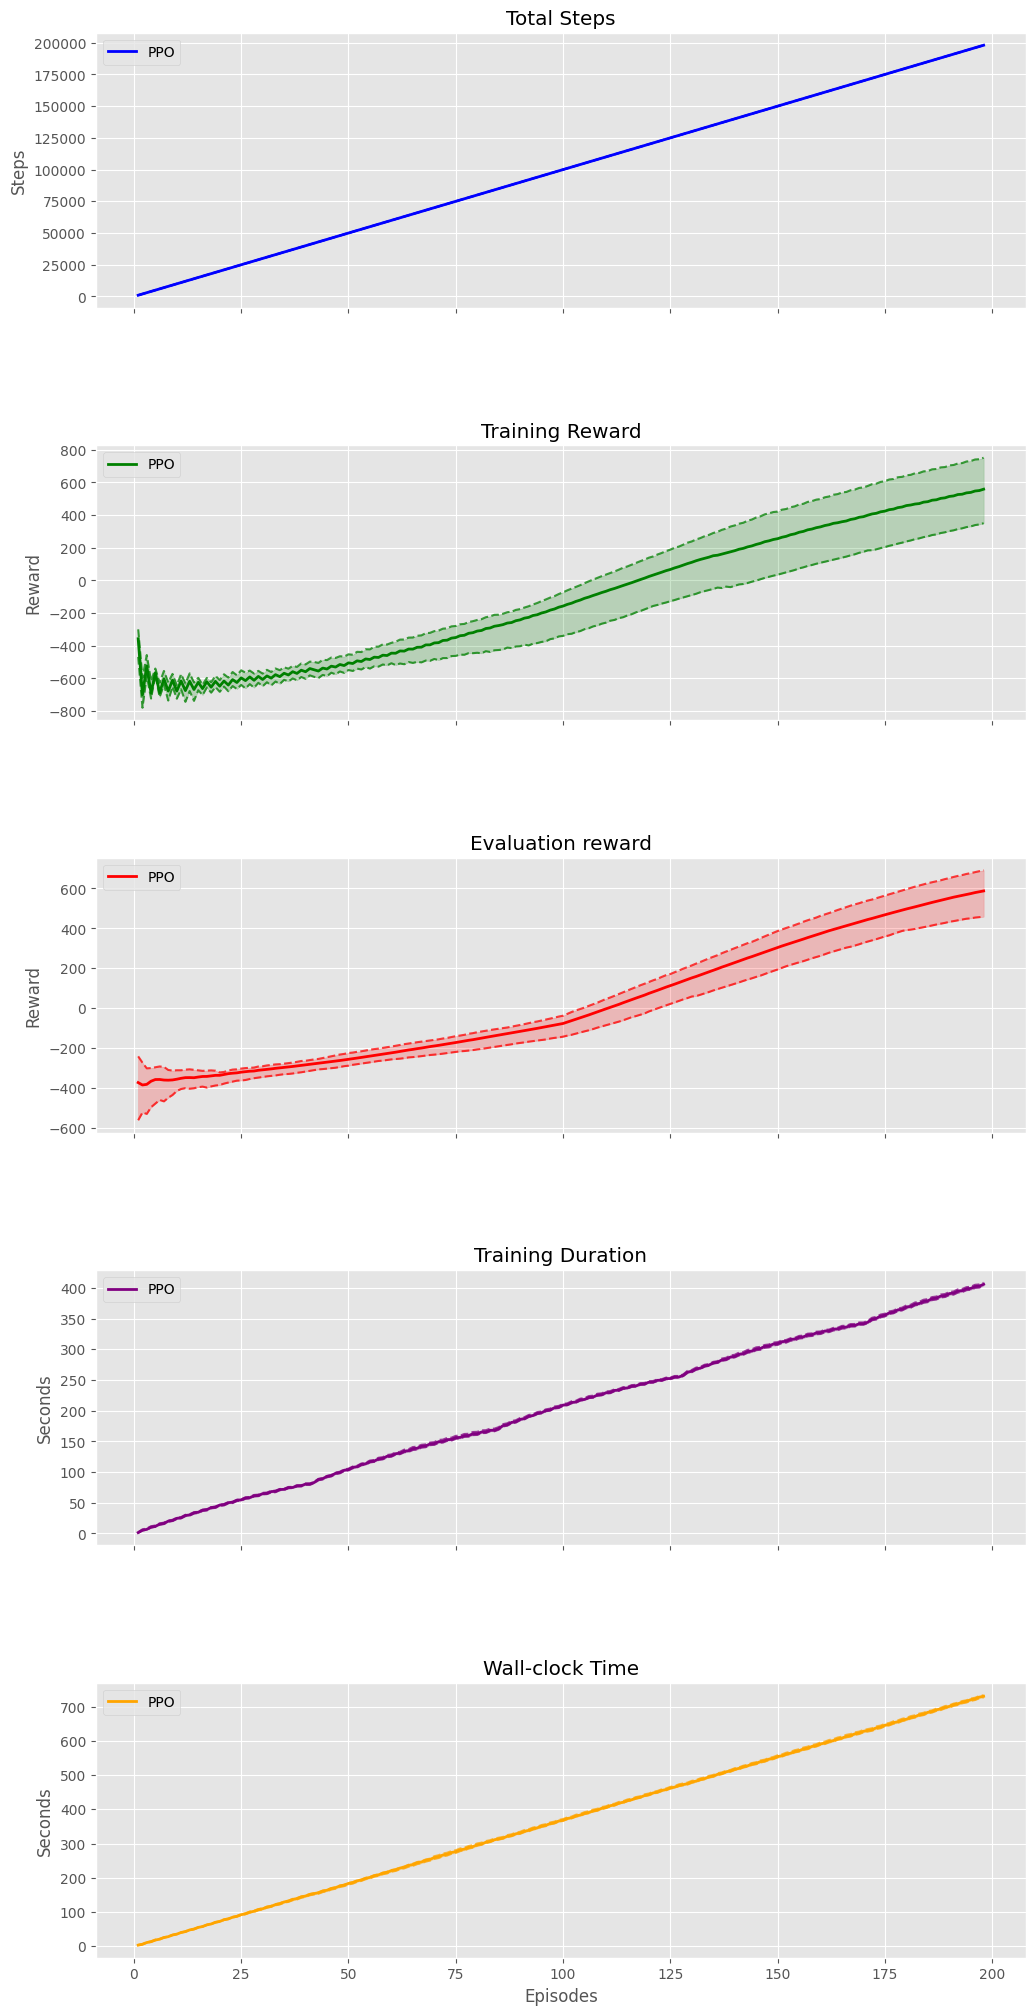

In [ ]:
import matplotlib.pyplot as plt
reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max = np.max(ppo_results, axis=0).T
reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min = np.min(ppo_results, axis=0).T
reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg = np.mean(ppo_results, axis=0).T
episode_indices = np.arange(len(reward_avg))

plt.style.use('ggplot')
fig, plot_areas = plt.subplots(5, 1, figsize=(12, 25), sharex='col')
fig.subplots_adjust(hspace=0.5)

colors = ['blue', 'green', 'red', 'purple', 'orange']
titles = ['Total Steps','Training Reward', 'Evaluation reward',  'Training Duration', 'Wall-clock Time']
y_labels = ['Steps', 'Reward', 'Reward', 'Seconds', 'Seconds']
data_max = [reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max]
data_min = [reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min]
data_avg = [reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg]

# Generate plots
for ax, title, color, max_data, min_data, avg_data, y_label in zip(plot_areas, titles, colors, data_max, data_min, data_avg, y_labels):
    ax.plot(max_data, linestyle='--', color=color, alpha=0.75)
    ax.plot(min_data, linestyle='--', color=color, alpha=0.75)
    ax.plot(avg_data, label='PPO', color=color, linewidth=2)
    ax.fill_between(episode_indices, min_data, max_data, color=color, alpha=0.2)
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.legend()

plot_areas[-1].set_xlabel('Episodes')
plt.show()


# Experiments and Plots
<a id="experiments"></a>

Run the DDPG, TD3, PPO on Pendulum, Hopper and Half Cheetah environment respectively.

Plot the following for each of the environment separately. Note based on different hyper-parameters and strategies you use, you can have multiple plots for each of the below.

As you are aware from your past experience, single run of the agent over the environment results in plots that have lot of variance and look very noisy. One way to overcome this is to create several different instances of the environment using different seeds and then average out the results across these and plot these. For all the plots below, you this strategy. You need to run 5 different instances of the environment for each agent. As you have seen in the lecture slides, we plot the maximum and minimum values around the mean in the plots, so this gives us the shaded plot with the mean curve in the between. In this assignment, you are required to do the same. Generate plots with envelop between maximum and minimum value
For each of the quantity of interest, plot each of the agent within the same plot using different colors for the envelop. Choose colors such that that there is clear contrast between the plots corresponding to different agents.

1. Plot mean train rewards vs episodes
2. Plot mean evaluation rewards vs episodes
3. Plot total steps vs episode
4. Plot train time vs episode
5. Plot wall clock time vs episode
6. Based on plots what are your observations about DDPG and TD3, compare the two algorithms.
7. What is the advatage of PPO over DDPG or TD3?